<a href="https://colab.research.google.com/github/CVH4OYC/computervision/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0_%D0%9B%D0%B0%D0%BD%D0%B4%D1%88%D0%B0%D1%84%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2. Визуализация градиентного спуска. Ландшафты потерь. Оптимайзеры.



In [ ]:
# готовим функцию для красивой отрисовки градиента
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-200.0, 202.0],
                  y_lims=[-200.0, 202.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [ ]:
# расcчитаем градиентный спуск для фунции для 10 cумма(x^2), x = тензор 1 на 2. Инициализирован значением 8
import torch

# тензор
x = torch.tensor(
    [200.,200.], requires_grad=True)

# сюда будем складывать значения тензора x при каждом шаге градиентного спуска
var_history = []

# сюда будем складывать значения функции при каждом шаге градиентного спуска
fn_history = []

# определяем функцию.
def function_parabola(variable):
    return 10 * (variable ** 2).sum()

# считаем шаг градиентного спуска
lr = 0.01
def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= lr * variable.grad
    variable.grad.zero_()

# реализуем градиентный спуск, думаем, что за 500 шагов справимся, и найдем минимум функции.
for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

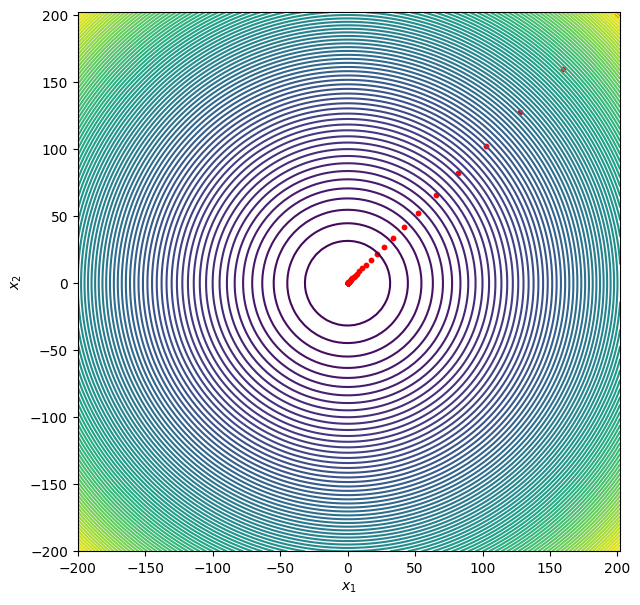

In [ ]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

## Задание 1. Сделайте трехмерную визуализацию сходимости градиентного спуска. Нарисуйте поверхность функции двух переменных для которой осуществлялся поиск минимума методом градиентного спуска. Отдельными точками другого цвета изобразите позиции которые рассматривались на каждом шаге градиентного спуска.

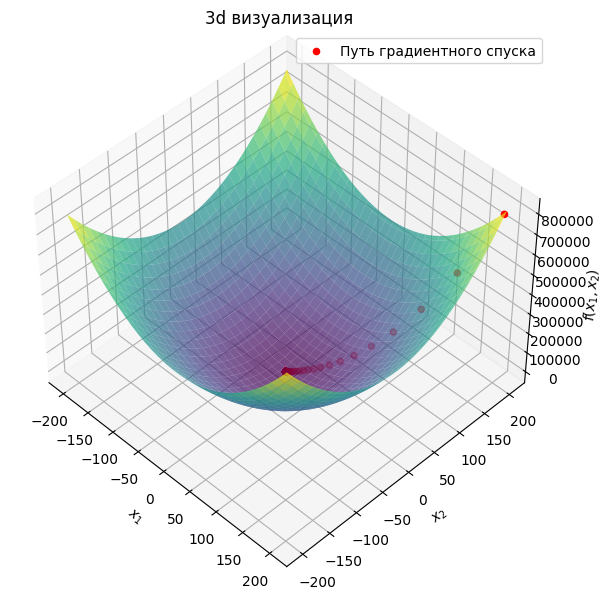

In [ ]:
# ваш код здесь
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_surface_and_path(objective, var_history, x_lims=[-200.0, 202.0], y_lims=[-200.0, 202.0], x_ticks=100, y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = objective(torch.tensor([X[i, j], Y[i, j]])).item()


    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    var_history_np = np.array(var_history)
    X_history = var_history_np[:, 0]
    Y_history = var_history_np[:, 1]
    Z_history = np.array([objective(torch.tensor([x, y])).item() for x, y in zip(X_history, Y_history)])

    ax.scatter(X_history, Y_history, Z_history, color='r', label='Путь градиентного спуска')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$f(x_1, x_2)$')
    ax.set_title('3d визуализация')

    ax.view_init(elev=45, azim=-45)

    plt.legend()
    plt.show()

plot_3d_surface_and_path(function_parabola, var_history)


## Задание 2. Для своего кода лабораторной работы №1 примените три разных оптимайзера. Постройте графики зависимости величины функции потерь от номера эпохи для всех трех оптимайзеров на одном графике сначала для обучающей выборки, потом для тестовой.

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Подгружаем данные CIFAR100
cifar100_train = torchvision.datasets.CIFAR100('./', download=True, train=True)
cifar100_test = torchvision.datasets.CIFAR100('./', download=True, train=False)
X_train = torch.tensor(cifar100_train.data).float()
y_train = torch.tensor(cifar100_train.targets)
X_test = torch.tensor(cifar100_test.data).float()
y_test = torch.tensor(cifar100_test.targets)

# Нормализуем данные
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.permute(0, 3, 1, 2)  # Приведение в форму (N, C, H, W)
X_test = X_test.permute(0, 3, 1, 2)

# Определение модели LeNet5
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2)
        self.act1 = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=0)
        self.act2 = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(64 * 6 * 6, 120)
        self.act3 = torch.nn.ReLU()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.ReLU()

        self.fc3 = torch.nn.Linear(84, 100)

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

# Функция для обучения модели
def train_model(optimizer, optimizer_name):
    loss_fn = torch.nn.CrossEntropyLoss()

    # Истории для графиков
    train_loss_history = []
    test_loss_history = []

    batch_size = 100
    for epoch in range(10):  # Чтобы ускорить обучение, уменьшим число эпох
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = lenet5.forward(X_batch)
            loss_value = loss_fn(preds, y_batch)

            loss_value.backward()
            optimizer.step()

        # Лосс на обучении
        train_loss_history.append(loss_value.data.cpu().numpy())

        # Лосс на тесте
        test_preds = lenet5.forward(X_test)
        test_loss_history.append(loss_fn(test_preds, y_test).data.cpu().numpy())

    return train_loss_history, test_loss_history

# Настройка устройства
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Создаем модель один раз
lenet5_model = LeNet5().to(device)

# Список оптимайзеров с параметрами
optimizers = {
    'Adam': torch.optim.Adam(lenet5_model.parameters(), lr=1.0e-3),
    'SGD': torch.optim.SGD(lenet5_model.parameters(), lr=1.0e-2, momentum=0.9),
    'RMSprop': torch.optim.RMSprop(lenet5_model.parameters(), lr=1.0e-3, alpha=0.99)
}

# Для хранения результатов
results_train = {}
results_test = {}

# Цикл по каждому оптимайзеру
for name, optimizer in optimizers.items():
  # Создаем модель один раз
    lenet5 = LeNet5().to(device)
    train_loss, test_loss = train_model(optimizer, name)
    results_train[name] = train_loss
    results_test[name] = test_loss




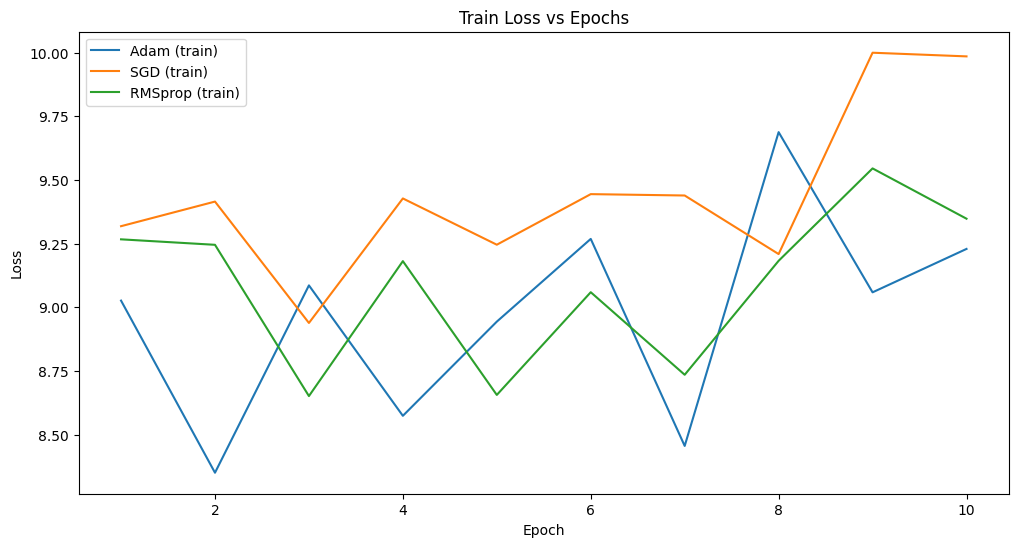

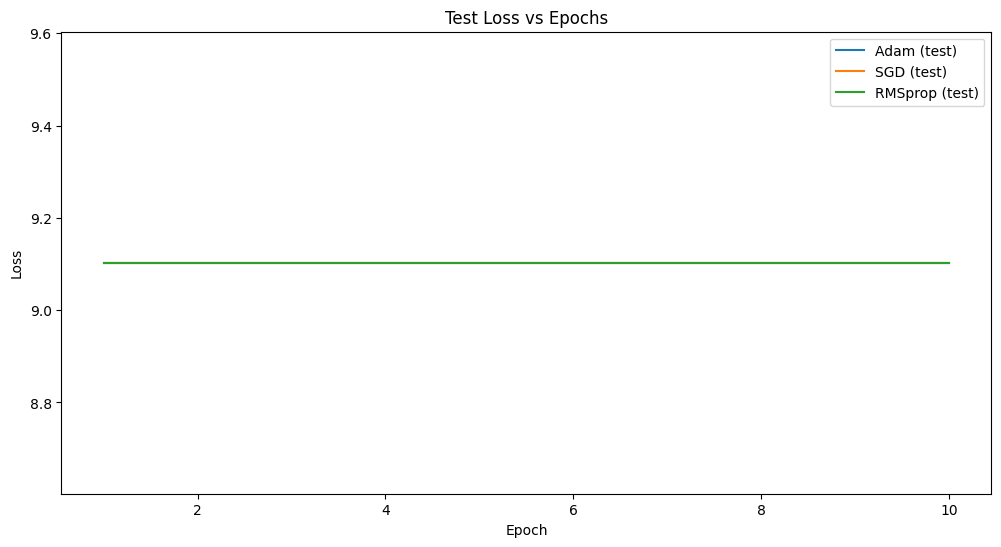

In [ ]:
# Построение графиков
epochs = range(1, 11)

# График для обучающей выборки
plt.figure(figsize=(12, 6))
for name, train_loss in results_train.items():
    plt.plot(epochs, train_loss, label=f'{name} (train)')
plt.title('Train Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# График для тестовой выборки
plt.figure(figsize=(12, 6))
for name, test_loss in results_test.items():
    plt.plot(epochs, test_loss, label=f'{name} (test)')
plt.title('Test Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Задание 3. Изучите статью https://habr.com/ru/companies/skillfactory/articles/536606/. Попробуйте воспроизвести ее результаты в своем коде. Если не получится сделать анимацию, можно те же графики оставить статическими.

В гите должны лежать гифки habr.gif, cifar100.gif, habr_sgd.gif.

Переделанный код из статьи (чтобы работало в Colabе)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import torchvision.transforms as transforms
from torchvision import datasets

transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Извлечение изображений и меток
X_train = mnist_train.data.numpy().reshape(-1, 784).astype(np.float32) / 255.0
y_train = mnist_train.targets.numpy().astype(np.float32)

# One-hot кодирование меток
oh = OneHotEncoder(categories='auto')
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()  # One-hot-кодирование y-значений




In [8]:
hidden_0=50 # number of nodes of first hidden layer
hidden_1=500 # number of nodes of second hidden layer

# Set up cost function:
def costs(x,y,w_a,w_b,seed_):
        np.random.seed(seed_) # insert random seed
        w0=np.random.randn(hidden_0,784)  # weight matrix of 1st hidden layer
        w1=np.random.randn(hidden_1,hidden_0) # weight matrix of 2nd hidden layer
        w2=np.random.randn(10,hidden_1) # weight matrix of output layer
        w2[5][250] = w_a # set value for weight w_250,5(2)
        w2[5][251] = w_b # set value for weight w_251,5(2)
        a0 = expit(w0 @ x.T)  # output of 1st hidden layer
        a1=expit(w1 @ a0)  # output of 2nd hidden layer
        pred= expit(w2 @ a1) # output of final layer
        return np.mean(np.sum((y-pred)**2,axis=0)) # costs w.r.t. w_a and w_b

<ipython-input-8-52535a8b3498>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][250] = w_a # set value for weight w_250,5(2)
<ipython-input-8-52535a8b3498>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][251] = w_b # set value for weight w_251,5(2)


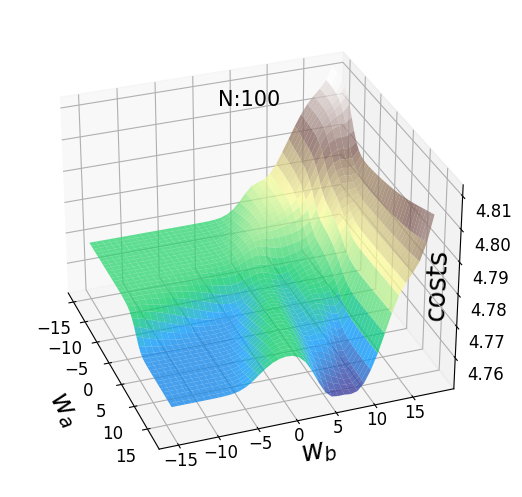

In [9]:
from scipy.special import expit
# Set range of values for meshgrid:
m1s = np.linspace(-15, 17, 40)
m2s = np.linspace(-15, 18, 40)
M1, M2 = np.meshgrid(m1s, m2s) # create meshgrid

# Determine costs for each coordinate in meshgrid:
zs_100 = np.array([costs(X_train[0:100],y_train_oh[0:100].T
                               ,np.array([[mp1]]), np.array([[mp2]]),135)
                       for mp1, mp2 in zip(np.ravel(M1), np.ravel(M2))])
Z_100 = zs_100.reshape(M1.shape) # z-values for N=100


# Plot loss landscapes:
fig = plt.figure(figsize=(10,7.5)) # create figure
ax0 = fig.add_subplot(121, projection='3d' )

fontsize_=20 # set axis label fontsize
labelsize_=12 # set tick label size

# Customize subplots:
ax0.view_init(elev=30, azim=-20)
ax0.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=9)
ax0.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=-5)
ax0.set_zlabel("costs", fontsize=fontsize_, labelpad=-30)
ax0.tick_params(axis='x', pad=5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=-5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=5, which='major', labelsize=labelsize_)
ax0.set_title('N:100',y=0.85,fontsize=15) # set title of subplot

# Surface plots of costs (= loss landscapes):
ax0.plot_surface(M1, M2, Z_100, cmap='terrain', #surface plot
                             antialiased=True,cstride=1,rstride=1, alpha=0.75)

plt.tight_layout()
plt.show()

In [10]:
# Store values of costs and weights in lists:
weights_2_5_250=[]
weights_2_5_251=[]
costs=[]

seed_= 135 # random seed
N=100 # sample size

# Set up neural network:
class NeuralNetwork(object):
    def __init__(self, lr=0.01):
        self.lr=lr
        np.random.seed(seed_) # set random seed
        # Intialize weight matrices:
        self.w0=np.random.randn(hidden_0,784)
        self.w1=np.random.randn(hidden_1,hidden_0)
        self.w2=np.random.randn(10,hidden_1)
        self.w2[5][250] = start_a # set starting value for w_a
        self.w2[5][251] = start_b # set starting value for w_b

    def train(self, X,y):
        a0 = expit(self.w0 @ X.T)
        a1=expit(self.w1 @ a0)
        pred= expit(self.w2 @ a1)
        # Partial derivatives of costs w.r.t. the weights of the output layer:
        dw2= (pred - y.T)*pred*(1-pred)  @ a1.T / len(X)   # ... averaged over the sample size
        # Update weights:
        self.w2[5][250]=self.w2[5][250] - self.lr * dw2[5][250]
        self.w2[5][251]=self.w2[5][251] - self.lr * dw2[5][251]
        costs.append(self.cost(pred,y)) # append cost values to list

    def cost(self, pred, y):
        return np.mean(np.sum((y.T-pred)**2,axis=0))

# Initial values of w_a/w_b:
starting_points = [  (-9,15),(-10.1,15),(-11,15)]

for j in starting_points:
    start_a,start_b=j
    model=NeuralNetwork(10) # set learning rate to 10
    for i in range(10000):  # 10,000 epochs
        model.train(X_train[0:N], y_train_oh[0:N])
        weights_2_5_250.append(model.w2[5][250]) # append weight values to list
        weights_2_5_251.append(model.w2[5][251]) # append weight values to list

# Create sublists of costs and weight values for each starting point:
costs = np.split(np.array(costs),3)
weights_2_5_250 = np.split(np.array(weights_2_5_250),3)
weights_2_5_251 = np.split(np.array(weights_2_5_251),3)

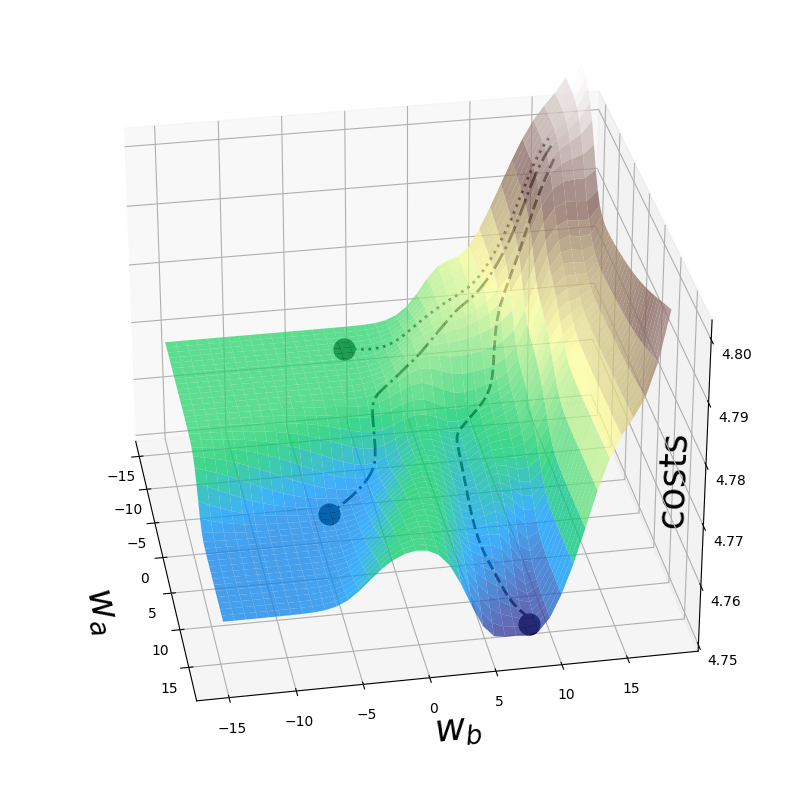

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Создаем фигуру и 3D-ось
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
line_style = ["dashed", "dashdot", "dotted"]  # Линии стиля
fontsize_ = 27  # Размер шрифта для подписей
labelsize_ = 17  # Размер шрифта для меток осей
ax.view_init(elev=30, azim=-10)
ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
ax.set_zlim(4.75, 4.802)  # Задаем диапазон для оси z

# Определяем, какие эпохи нужно визуализировать
p1 = list(np.arange(0, 200, 20))
p2 = list(np.arange(200, 9000, 100))
points_ = p1 + p2

# Функция для обновления анимации
def update(frame):
  ax.cla()  # Очищаем ось перед каждой итерацией
  ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
  ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
  ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
  ax.set_zlim(4.75, 4.802)  # Задаем диапазон для оси z

  # Получаем текущую эпоху из points_
  current_epoch = points_[frame]

  for j in range(3):
      if current_epoch < len(weights_2_5_250[j]):  # Проверяем, чтобы не выходить за границы
          ax.plot(weights_2_5_250[j][0:current_epoch + 1],
                  weights_2_5_251[j][0:current_epoch + 1],
                  costs[j][0:current_epoch + 1],
                  linestyle=line_style[j], linewidth=2, color="black")
          ax.scatter(weights_2_5_250[j][current_epoch],
                      weights_2_5_251[j][current_epoch],
                      costs[j][current_epoch],
                      marker='o', s=15 ** 2, color="black", alpha=1.0)

  # Поверхность (ландшафт потерь)
  ax.plot_surface(M1, M2, Z_100, cmap='terrain',
                    antialiased=True, cstride=1, rstride=1, alpha=0.75)

# Создаем анимацию с количеством кадров, соответствующим длине points_
ani = FuncAnimation(fig, update, frames=len(points_), repeat=True, interval=50)  # Увеличьте interval для ускорения

# Сохраняем анимацию в формате GIF с использованием Pillow
ani.save('habr.gif', writer='pillow', dpi=72)

plt.show()


Переделал под свой датасет (CIFAR100), но получилось не так красиво

In [13]:
# Импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import torchvision.transforms as transforms
from torchvision import datasets
import gzip
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import expit
from matplotlib import animation


transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

# Загрузка обучающего набора данных CIFAR-100
cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Извлечение изображений и меток
X_train = cifar100_train.data.astype(np.float32) / 255.0  # Масштабируем пиксельные значения от 0 до 1

# Преобразование X_train в двумерный массив (каждое изображение 32x32x3, поэтому вектор будет размером 3072)
X_train = X_train.reshape(-1, 32*32*3).astype(np.float32)
y_train = np.array(cifar100_train.targets).astype(np.float32)  # Преобразуем метки в numpy

# One-hot кодирование меток
oh = OneHotEncoder(categories='auto')
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()  # One-hot-кодирование y-значений

# Проверка размеров данных
print(f'X_train shape: {X_train.shape}')
print(f'y_train_oh shape: {y_train_oh.shape}')





100%|██████████| 169001437/169001437 [00:10<00:00, 16210762.76it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
X_train shape: (50000, 3072)
y_train_oh shape: (50000, 100)


In [15]:
hidden_0=50 # number of nodes of first hidden layer
hidden_1=500 # number of nodes of second hidden layer

# Set up cost function:
def costs(x,y,w_a,w_b,seed_):
        np.random.seed(seed_) # insert random seed
        w0=np.random.randn(hidden_0,3072)  # weight matrix of 1st hidden layer
        w1=np.random.randn(hidden_1,hidden_0) # weight matrix of 2nd hidden layer
        w2=np.random.randn(100,hidden_1) # weight matrix of output layer
        w2[5][250] = w_a # set value for weight w_250,5(2)
        w2[5][251] = w_b # set value for weight w_251,5(2)
        a0 = expit(w0 @ x.T)  # output of 1st hidden layer
        a1=expit(w1 @ a0)  # output of 2nd hidden layer
        pred= expit(w2 @ a1) # output of final layer
        return np.mean(np.sum((y-pred)**2,axis=0)) # costs w.r.t. w_a and w_b

In [18]:
# Set range of values for meshgrid:
m1s = np.linspace(-15, 17, 40)
m2s = np.linspace(-15, 18, 40)
M1, M2 = np.meshgrid(m1s, m2s)  # create meshgrid

# Determine costs for each coordinate in meshgrid:
zs_100 = np.array([costs(X_train[0:100], y_train_oh[0:100].T,
                         np.array([[mp1]]), np.array([[mp2]]), 135)
                   for mp1, mp2 in zip(np.ravel(M1), np.ravel(M2))])
Z_100 = zs_100.reshape(M1.shape)  # z-values for N=100




<ipython-input-15-cf2aa61d6a7d>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][250] = w_a # set value for weight w_250,5(2)
<ipython-input-15-cf2aa61d6a7d>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][251] = w_b # set value for weight w_251,5(2)


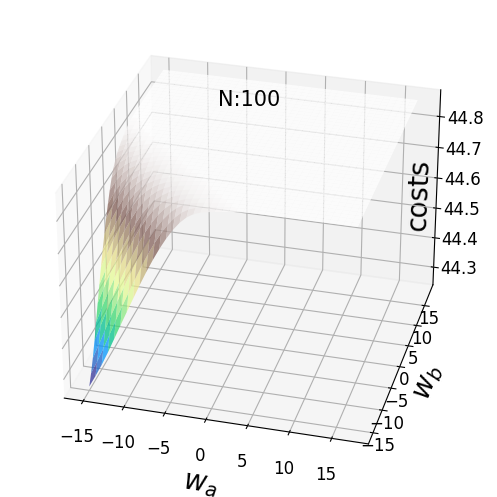

In [19]:
# Plot loss landscapes:
fig = plt.figure(figsize=(10, 7.5))  # create figure
ax0 = fig.add_subplot(121, projection='3d')

fontsize_ = 20  # set axis label fontsize
labelsize_ = 12  # set tick label size

# Customize subplots:
ax0.view_init(elev=30, azim=-20)
ax0.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=9)
ax0.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=-5)
ax0.set_zlabel("costs", fontsize=fontsize_, labelpad=-30)
ax0.tick_params(axis='x', pad=5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=-5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=5, which='major', labelsize=labelsize_)
ax0.set_title('N:100', y=0.85, fontsize=15)  # set title of subplot

# Surface plots of costs (= loss landscapes):
ax0.plot_surface(M1, M2, Z_100, cmap='terrain',  # surface plot
                 antialiased=True, cstride=1, rstride=1, alpha=0.75)
ax0.view_init(elev=30, azim=-75)
plt.tight_layout()
plt.show()

In [26]:
# Store values of costs and weights in lists:
weights_2_5_250=[]
weights_2_5_251=[]
costs=[]

seed_= 135 # random seed
N=100 # sample size

# Set up neural network:
class NeuralNetwork(object):
    def __init__(self, lr=0.01):
        self.lr=lr
        np.random.seed(seed_) # set random seed
        # Intialize weight matrices:
        self.w0=np.random.randn(hidden_0,3072)
        self.w1=np.random.randn(hidden_1,hidden_0)
        self.w2=np.random.randn(100,hidden_1)
        self.w2[5][250] = start_a # set starting value for w_a
        self.w2[5][251] = start_b # set starting value for w_b

    def train(self, X,y):
        a0 = expit(self.w0 @ X.T)
        a1=expit(self.w1 @ a0)
        pred= expit(self.w2 @ a1)
        # Partial derivatives of costs w.r.t. the weights of the output layer:
        dw2= (pred - y.T)*pred*(1-pred)  @ a1.T / len(X)   # ... averaged over the sample size
        # Update weights:
        self.w2[5][250]=self.w2[5][250] - self.lr * dw2[5][250]
        self.w2[5][251]=self.w2[5][251] - self.lr * dw2[5][251]
        costs.append(self.cost(pred,y)) # append cost values to list

    def cost(self, pred, y):
        return np.mean(np.sum((y.T-pred)**2,axis=0))

# Initial values of w_a/w_b:
starting_points = [  (-14,-8),(-12,-10),(-10,-12)]

for j in starting_points:
    start_a,start_b=j
    model=NeuralNetwork(10) # set learning rate to 10
    for i in range(10000):  # 10,000 epochs
        model.train(X_train[0:N], y_train_oh[0:N])
        weights_2_5_250.append(model.w2[5][250]) # append weight values to list
        weights_2_5_251.append(model.w2[5][251]) # append weight values to list

# Create sublists of costs and weight values for each starting point:
costs = np.split(np.array(costs),3)
weights_2_5_250 = np.split(np.array(weights_2_5_250),3)
weights_2_5_251 = np.split(np.array(weights_2_5_251),3)

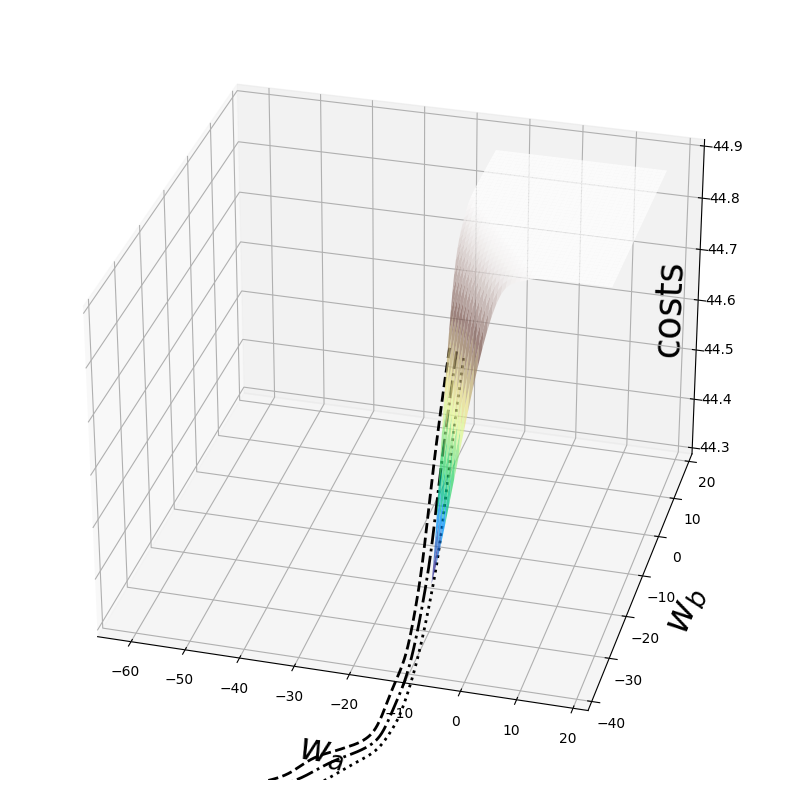

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Создаем фигуру и 3D-ось
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
line_style = ["dashed", "dashdot", "dotted"]  # Линии стиля
fontsize_ = 27  # Размер шрифта для подписей
labelsize_ = 17  # Размер шрифта для меток осей
ax.view_init(elev=30, azim=-75)
ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
ax.set_zlim(44.3, 44.9)  # Задаем диапазон для оси z

# Определяем, какие эпохи нужно визуализировать
p1 = list(np.arange(0, 200, 20))
p2 = list(np.arange(200, 9000, 100))
points_ = p1 + p2

# Функция для обновления анимации
def update(frame):
    ax.cla()  # Очищаем ось перед каждой итерацией
    ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
    ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
    ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
    ax.set_zlim(44.3, 44.9)  # Задаем диапазон для оси z
    ax.view_init(elev=30, azim=-75)
    # Получаем текущую эпоху из points_
    current_epoch = points_[frame]

    for j in range(3):
        if current_epoch < len(weights_2_5_250[j]):
            ax.plot(weights_2_5_250[j][0:current_epoch + 1],
                    weights_2_5_251[j][0:current_epoch + 1],
                    costs[j][0:current_epoch + 1],
                    linestyle=line_style[j], linewidth=2, color="black")
            ax.scatter(weights_2_5_250[j][current_epoch],
                       weights_2_5_251[j][current_epoch],
                       costs[j][current_epoch],
                       marker='o', s=15 ** 2, color="black", alpha=1.0)

    # Поверхность (ландшафт потерь)
    ax.plot_surface(M1, M2, Z_100, cmap='terrain',
                     antialiased=True, cstride=1, rstride=1, alpha=0.75)

# Создаем анимацию с количеством кадров, соответствующим длине points_
ani = FuncAnimation(fig, update, frames=len(points_), repeat=True, interval=50)

# Сохраняем анимацию в формате GIF с использованием Pillow
ani.save('cifar100.gif', writer='pillow', dpi=72)

plt.show()


## Задание 4. В коде, полученном после выполнения задания 3, релизуйте по формулам один из оптимайзеров. Как изменится визуализация поиска минимума из тех же трех точек?

Для MNISTа с хабра получилось построить какие-то прямые линии, а не траектории. А для CIFAR вообще никакие траектории не вывелись.

Для кода с Хабра

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import torchvision.transforms as transforms
from torchvision import datasets

transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Извлечение изображений и меток
X_train = mnist_train.data.numpy().reshape(-1, 784).astype(np.float32) / 255.0
y_train = mnist_train.targets.numpy().astype(np.float32)

# One-hot кодирование меток
oh = OneHotEncoder(categories='auto')
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()  # One-hot-кодирование y-значений


In [69]:
hidden_0=50 # number of nodes of first hidden layer
hidden_1=500 # number of nodes of second hidden layer

# Set up cost function:
def costs(x,y,w_a,w_b,seed_):
        np.random.seed(seed_) # insert random seed
        w0=np.random.randn(hidden_0,784)  # weight matrix of 1st hidden layer
        w1=np.random.randn(hidden_1,hidden_0) # weight matrix of 2nd hidden layer
        w2=np.random.randn(10,hidden_1) # weight matrix of output layer
        w2[5][250] = w_a # set value for weight w_250,5(2)
        w2[5][251] = w_b # set value for weight w_251,5(2)
        a0 = expit(w0 @ x.T)  # output of 1st hidden layer
        a1=expit(w1 @ a0)  # output of 2nd hidden layer
        pred= expit(w2 @ a1) # output of final layer
        return np.mean(np.sum((y-pred)**2,axis=0)) # costs w.r.t. w_a and w_b

<ipython-input-69-52535a8b3498>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][250] = w_a # set value for weight w_250,5(2)
<ipython-input-69-52535a8b3498>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][251] = w_b # set value for weight w_251,5(2)


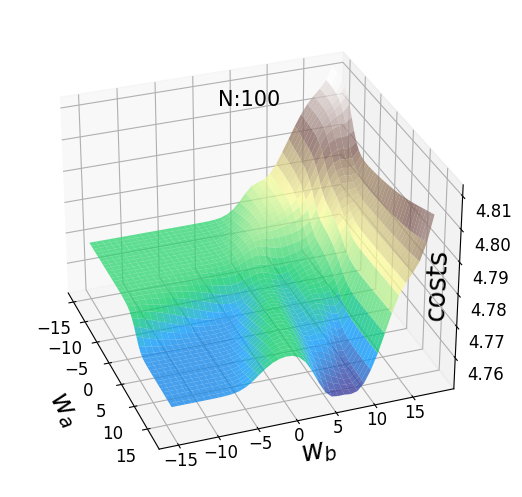

In [70]:
from scipy.special import expit
# Set range of values for meshgrid:
m1s = np.linspace(-15, 17, 40)
m2s = np.linspace(-15, 18, 40)
M1, M2 = np.meshgrid(m1s, m2s) # create meshgrid

# Determine costs for each coordinate in meshgrid:
zs_100 = np.array([costs(X_train[0:100],y_train_oh[0:100].T
                               ,np.array([[mp1]]), np.array([[mp2]]),135)
                       for mp1, mp2 in zip(np.ravel(M1), np.ravel(M2))])
Z_100 = zs_100.reshape(M1.shape) # z-values for N=100


# Plot loss landscapes:
fig = plt.figure(figsize=(10,7.5)) # create figure
ax0 = fig.add_subplot(121, projection='3d' )

fontsize_=20 # set axis label fontsize
labelsize_=12 # set tick label size

# Customize subplots:
ax0.view_init(elev=30, azim=-20)
ax0.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=9)
ax0.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=-5)
ax0.set_zlabel("costs", fontsize=fontsize_, labelpad=-30)
ax0.tick_params(axis='x', pad=5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=-5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=5, which='major', labelsize=labelsize_)
ax0.set_title('N:100',y=0.85,fontsize=15) # set title of subplot

# Surface plots of costs (= loss landscapes):
ax0.plot_surface(M1, M2, Z_100, cmap='terrain', #surface plot
                             antialiased=True,cstride=1,rstride=1, alpha=0.75)

plt.tight_layout()
plt.show()

In [77]:
# Создаем списки для хранения значений весов и стоимости
weights_2_5_250 = []
weights_2_5_251 = []
costs_list = []

# Класс нейронной сети с реализацией SGD
class NeuralNetworkSGD(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        np.random.seed(seed_)
        # Инициализируем веса
        self.w0 = np.random.randn(hidden_0, 784)
        self.w1 = np.random.randn(hidden_1, hidden_0)
        self.w2 = np.random.randn(10, hidden_1)
        self.w2[5][250] = start_a  # начальное значение w_a
        self.w2[5][251] = start_b  # начальное значение w_b

    def train(self, X, y, batch_size=10):
        idx = np.random.choice(len(X), batch_size, replace=False)  # случайный выбор батча
        x_sample = X[idx]
        y_sample = y[idx]

        a0 = expit(self.w0 @ x_sample.T)
        a1 = expit(self.w1 @ a0)
        pred = expit(self.w2 @ a1)

        dw2 = (pred - y_sample.T) * pred * (1 - pred) @ a1.T / batch_size
        self.w2[5][250] -= self.lr * dw2[5][250]
        self.w2[5][251] -= self.lr * dw2[5][251]

        # Обновляем функцию стоимости для всего батча
        costs_list.append(self.cost(pred, y_sample))


    def cost(self, pred, y):
        return np.mean(np.sum((y.T - pred) ** 2, axis=0))

# Начальные точки для весов
starting_points = [(-9, 15), (-10.1, 15), (-11, 15)]

# Список для хранения всех значений стоимости и весов
all_costs = []  # список для хранения всех значений стоимости
all_weights_250 = []  # список для хранения всех значений весов w_250
all_weights_251 = []  # список для хранения всех значений весов w_251

# Процесс обучения для каждой начальной точки
for j in starting_points:
    start_a, start_b = j
    model = NeuralNetworkSGD(lr=10)
    weights_a = []  # локальный список для хранения весов w_a
    weights_b = []  # локальный список для хранения весов w_b
    costs = []  # локальный список для хранения стоимости

    for i in range(10000):  # 10000 эпох
        model.train(X_train[0:100], y_train_oh[0:100],batch_size=10)
        weights_a.append(model.w2[5][250])  # добавляем w_a в локальный список
        weights_b.append(model.w2[5][251])  # добавляем w_b в локальный список
        costs.append(model.cost(model.w2[5][250], y_train_oh[0:100]))  # добавляем текущую стоимость

    all_weights_250.append(weights_a)  # добавляем локальный список в глобальный
    all_weights_251.append(weights_b)  # добавляем локальный список в глобальный
    all_costs.append(costs)  # добавляем локальный список стоимости в глобальный

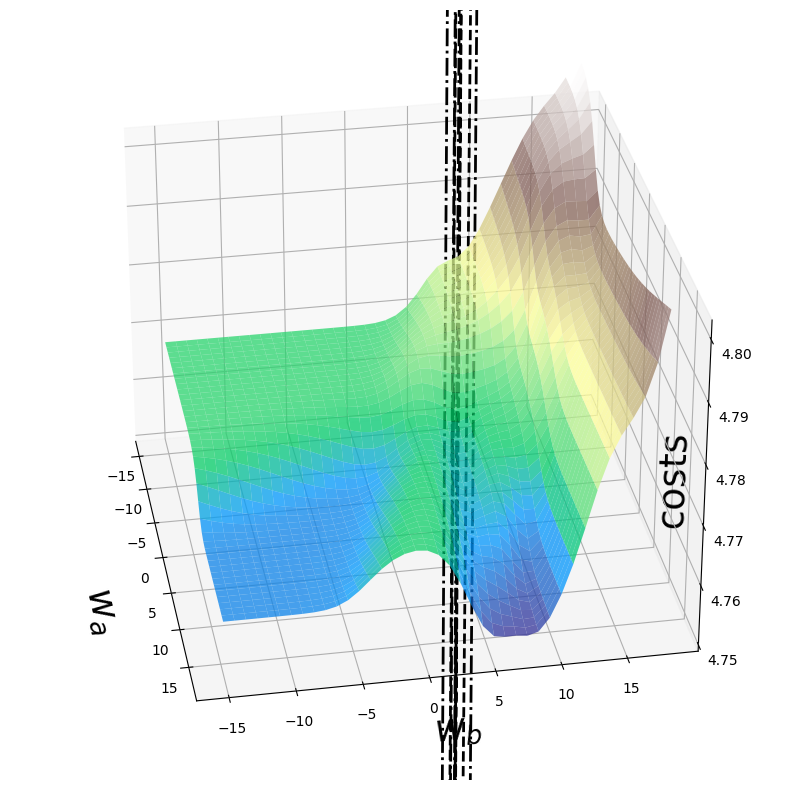

In [78]:
# Визуализация результата
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Создаем фигуру и 3D-ось
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
line_style = ["dashed", "dashdot", "dotted"]  # Линии стиля
fontsize_ = 27  # Размер шрифта для подписей
labelsize_ = 17  # Размер шрифта для меток осей
ax.view_init(elev=30, azim=-10)
ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
ax.set_zlim(4.75, 4.802)  # Задаем диапазон для оси z

# Определяем, какие эпохи нужно визуализировать
p1 = list(np.arange(0, 200, 10))
p2 = list(np.arange(200, 9000, 50))
points_ = p1 + p2

# Функция для обновления анимации
def update(frame):
    ax.cla()  # Очищаем ось перед каждой итерацией
    ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
    ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
    ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
    ax.set_zlim(4.75, 4.802)  # Задаем диапазон для оси z

    # Получаем текущую эпоху из points_
    current_epoch = points_[frame]

    for j in range(3):
        if current_epoch < len(all_weights_250[j]):  # Проверяем, чтобы не выходить за границы
            ax.plot(all_weights_250[j][0:current_epoch + 1],
                    all_weights_251[j][0:current_epoch + 1],
                    all_costs[j][0:current_epoch + 1],  # Используем all_costs
                    linestyle=line_style[j], linewidth=2, color="black")
            ax.scatter(all_weights_250[j][current_epoch],
                       all_weights_251[j][current_epoch],
                       all_costs[j][current_epoch],  # Используем all_costs
                       marker='o', s=15 ** 2, color="black", alpha=1.0)

    # Поверхность (ландшафт потерь)
    ax.plot_surface(M1, M2, Z_100, cmap='terrain',
                     antialiased=True, cstride=1, rstride=1, alpha=0.75)

# Создаем анимацию с количеством кадров, соответствующим длине points_
ani = FuncAnimation(fig, update, frames=len(points_), repeat=True, interval=50)

# Сохраняем анимацию в формате GIF с использованием Pillow
ani.save('habr_sgd.gif', writer='pillow', dpi=72)

plt.show()

Для CIFAR100

In [79]:
# Импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import torchvision.transforms as transforms
from torchvision import datasets
import gzip
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import expit
from matplotlib import animation


transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

# Загрузка обучающего набора данных CIFAR-100
cifar100_train = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Извлечение изображений и меток
X_train = cifar100_train.data.astype(np.float32) / 255.0  # Масштабируем пиксельные значения от 0 до 1

X_train = X_train.reshape(-1, 32*32*3).astype(np.float32)
y_train = np.array(cifar100_train.targets).astype(np.float32)  # Преобразуем метки в numpy

# One-hot кодирование меток
oh = OneHotEncoder(categories='auto')
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()  # One-hot-кодирование y-значений




Files already downloaded and verified


In [80]:
hidden_0=50 # number of nodes of first hidden layer
hidden_1=500 # number of nodes of second hidden layer

# Set up cost function:
def costs(x,y,w_a,w_b,seed_):
        np.random.seed(seed_) # insert random seed
        w0=np.random.randn(hidden_0,3072)  # weight matrix of 1st hidden layer
        w1=np.random.randn(hidden_1,hidden_0) # weight matrix of 2nd hidden layer
        w2=np.random.randn(100,hidden_1) # weight matrix of output layer
        w2[5][250] = w_a # set value for weight w_250,5(2)
        w2[5][251] = w_b # set value for weight w_251,5(2)
        a0 = expit(w0 @ x.T)  # output of 1st hidden layer
        a1=expit(w1 @ a0)  # output of 2nd hidden layer
        pred= expit(w2 @ a1) # output of final layer
        return np.mean(np.sum((y-pred)**2,axis=0)) # costs w.r.t. w_a and w_b

In [81]:
# Set range of values for meshgrid:
m1s = np.linspace(-15, 17, 40)
m2s = np.linspace(-15, 18, 40)
M1, M2 = np.meshgrid(m1s, m2s)  # create meshgrid

# Determine costs for each coordinate in meshgrid:
zs_100 = np.array([costs(X_train[0:100], y_train_oh[0:100].T,
                         np.array([[mp1]]), np.array([[mp2]]), 135)
                   for mp1, mp2 in zip(np.ravel(M1), np.ravel(M2))])
Z_100 = zs_100.reshape(M1.shape)  # z-values for N=100




<ipython-input-80-cf2aa61d6a7d>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][250] = w_a # set value for weight w_250,5(2)
<ipython-input-80-cf2aa61d6a7d>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[5][251] = w_b # set value for weight w_251,5(2)


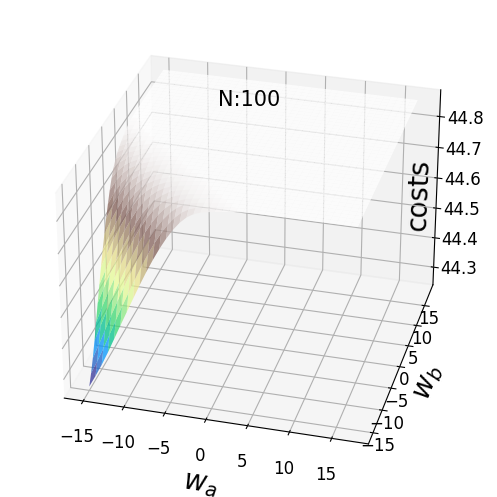

In [82]:
# Plot loss landscapes:
fig = plt.figure(figsize=(10, 7.5))  # create figure
ax0 = fig.add_subplot(121, projection='3d')

fontsize_ = 20  # set axis label fontsize
labelsize_ = 12  # set tick label size

# Customize subplots:
ax0.view_init(elev=30, azim=-20)
ax0.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=9)
ax0.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=-5)
ax0.set_zlabel("costs", fontsize=fontsize_, labelpad=-30)
ax0.tick_params(axis='x', pad=5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=-5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=5, which='major', labelsize=labelsize_)
ax0.set_title('N:100', y=0.85, fontsize=15)  # set title of subplot

# Surface plots of costs (= loss landscapes):
ax0.plot_surface(M1, M2, Z_100, cmap='terrain',  # surface plot
                 antialiased=True, cstride=1, rstride=1, alpha=0.75)
ax0.view_init(elev=30, azim=-75)
plt.tight_layout()
plt.show()

In [88]:
# Создаем списки для хранения значений весов и стоимости
weights_2_5_250 = []
weights_2_5_251 = []
costs_list = []

# Класс нейронной сети с реализацией SGD
class NeuralNetworkSGD(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        np.random.seed(seed_)
        # Инициализируем веса
        self.w0 = np.random.randn(hidden_0, 3072)
        self.w1 = np.random.randn(hidden_1, hidden_0)
        self.w2 = np.random.randn(100, hidden_1)
        self.w2[5][250] = start_a  # начальное значение w_a
        self.w2[5][251] = start_b  # начальное значение w_b

    def train(self, X, y, batch_size=10):
        idx = np.random.choice(len(X), batch_size, replace=False)  # случайный выбор батча
        x_sample = X[idx]
        y_sample = y[idx]

        a0 = expit(self.w0 @ x_sample.T)
        a1 = expit(self.w1 @ a0)
        pred = expit(self.w2 @ a1)

        dw2 = (pred - y_sample.T) * pred * (1 - pred) @ a1.T / batch_size
        self.w2[5][250] -= self.lr * dw2[5][250]
        self.w2[5][251] -= self.lr * dw2[5][251]

        # Обновляем функцию стоимости для всего батча
        costs_list.append(self.cost(pred, y_sample))


    def cost(self, pred, y):
        return np.mean(np.sum((y.T - pred) ** 2, axis=0))

# Начальные точки для весов
starting_points = [  (-14,-8),(-12,-10),(-10,-12)]

# Список для хранения всех значений стоимости и весов
all_costs = []  # список для хранения всех значений стоимости
all_weights_250 = []  # список для хранения всех значений весов w_250
all_weights_251 = []  # список для хранения всех значений весов w_251

# Процесс обучения для каждой начальной точки
for j in starting_points:
    start_a, start_b = j
    model = NeuralNetworkSGD(lr=0.001)
    weights_a = []  # локальный список для хранения весов w_a
    weights_b = []  # локальный список для хранения весов w_b
    costs = []  # локальный список для хранения стоимости

    for i in range(10000):  # 10000 эпох
        model.train(X_train[0:100], y_train_oh[0:100],batch_size=10)
        weights_a.append(model.w2[5][250])  # добавляем w_a в локальный список
        weights_b.append(model.w2[5][251])  # добавляем w_b в локальный список
        costs.append(model.cost(model.w2[5][250], y_train_oh[0:100]))  # добавляем текущую стоимость

    all_weights_250.append(weights_a)  # добавляем локальный список в глобальный
    all_weights_251.append(weights_b)  # добавляем локальный список в глобальный
    all_costs.append(costs)  # добавляем локальный список стоимости в глобальный

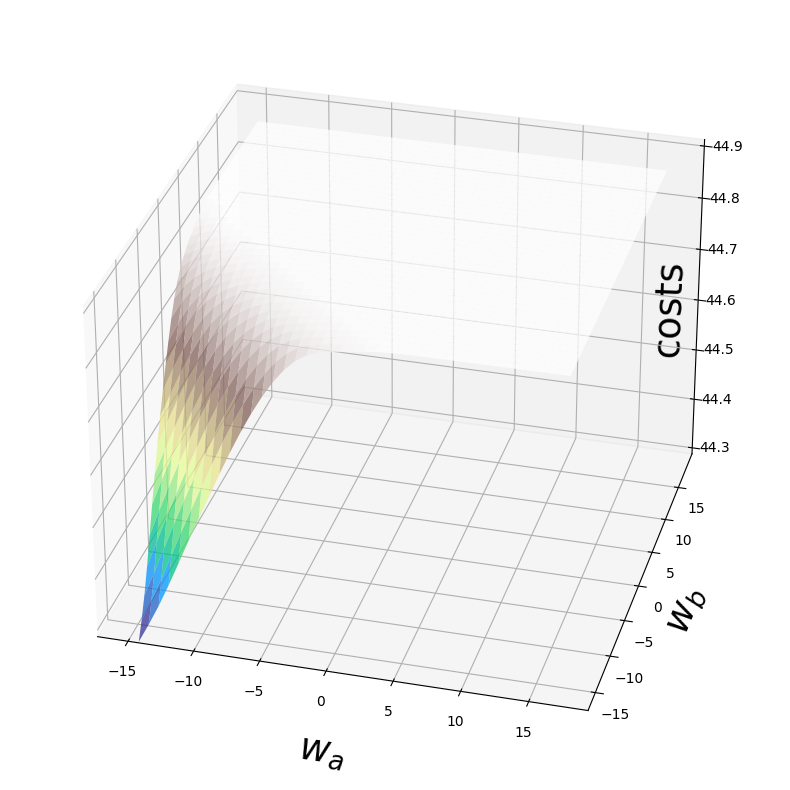

In [89]:
# Визуализация результата
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Создаем фигуру и 3D-ось
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
line_style = ["dashed", "dashdot", "dotted"]  # Линии стиля
fontsize_ = 27  # Размер шрифта для подписей
labelsize_ = 17  # Размер шрифта для меток осей
ax.view_init(elev=30, azim=-10)
ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
ax.set_zlim(44.3, 44.9)  # Задаем диапазон для оси z
ax.view_init(elev=30, azim=-75)
# Определяем, какие эпохи нужно визуализировать
p1 = list(np.arange(0, 200, 20))
p2 = list(np.arange(200, 9000, 100))
points_ = p1 + p2

# Функция для обновления анимации
def update(frame):
    ax.cla()  # Очищаем ось перед каждой итерацией
    ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
    ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
    ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
    ax.set_zlim(44.3, 44.9) # Задаем диапазон для оси z
    ax.view_init(elev=30, azim=-75)
    # Получаем текущую эпоху из points_
    current_epoch = points_[frame]

    for j in range(3):
        if current_epoch < len(all_weights_250[j]):  # Проверяем, чтобы не выходить за границы
            ax.plot(all_weights_250[j][0:current_epoch + 1],
                    all_weights_251[j][0:current_epoch + 1],
                    all_costs[j][0:current_epoch + 1],  # Используем all_costs
                    linestyle=line_style[j], linewidth=2, color="black")
            ax.scatter(all_weights_250[j][current_epoch],
                       all_weights_251[j][current_epoch],
                       all_costs[j][current_epoch],  # Используем all_costs
                       marker='o', s=15 ** 2, color="black", alpha=1.0)

    # Поверхность (ландшафт потерь)
    ax.plot_surface(M1, M2, Z_100, cmap='terrain',
                     antialiased=True, cstride=1, rstride=1, alpha=0.75)

# Создаем анимацию с количеством кадров, соответствующим длине points_
ani = FuncAnimation(fig, update, frames=len(points_), repeat=True, interval=50)

# Сохраняем анимацию в формате GIF с использованием Pillow
ani.save('cifar_sgd.gif', writer='pillow', dpi=72)

plt.show()